<a href="https://colab.research.google.com/github/majesticio/Project1_Data_Science/blob/master/Project_1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Transaction Success with Unnamed Variables
*A Binary Classification Problem using Naive Bayes Supervised Machine Learning*

In [97]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [98]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import sklearn.model_selection as model_selection
import copy

Let's import the <.csv> file and assign it's file path to a variable. Here comes some data!

In [99]:
file_name_1 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Train.csv')

In [100]:
train = file_name_1
train.head()

,Unnamed: 0,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,2.9252,3.1821,14.0137,0.5745,8.7989,14.5691,5.7487,-7.2393,4.2840,30.7133,10.5350,16.2191,2.5791,2.4716,14.3831,13.4325,-5.1488,-0.4073,4.9306,5.9965,-0.3085,12.9041,-3.8766,16.8911,11.1920,10.5785,0.6764,...,15.4576,5.3133,3.6159,5.0384,6.6760,12.6644,2.7004,-0.6975,9.5981,5.4879,-4.7645,-8.4254,20.8773,3.1531,18.5618,7.7423,-10.1245,13.7241,-3.5189,1.7202,-8.4051,9.0164,3.0657,14.3691,25.8398,5.8764,11.8411,-19.7159,17.5743,0.5857,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,-0.4032,8.0585,14.0239,8.4135,5.4345,13.7003,13.8275,-15.5849,7.8000,28.5708,3.4287,2.7407,8.5524,3.3716,6.9779,13.8910,-11.7684,-2.5586,5.0464,0.5481,-9.2987,7.8755,1.2859,19.3710,11.3702,0.7399,2.7995,...,29.4846,5.8683,3.8208,15.8348,-5.0121,15.1345,3.2003,9.3192,3.8821,5.7999,5.5378,5.0988,22.0330,5.5134,30.2645,10.4968,-7.2352,16.5721,-7.3477,11.0752,-5.5937,9.4878,-14.9100,9.4245,22.5441,-4.8622,7.6543,-15.9319,13.3175,-0.3566,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,5.9525,-0.3249,-11.2648,14.1929,7.3124,7.5244,14.6472,7.6782,-1.7395,4.7011,20.4775,17.7559,18.1377,1.2145,3.5137,5.6777,13.2177,-7.9940,-2.9029,5.8463,6.1439,-11.1025,12.4858,-2.2871,19.0422,11.0449,4.1087,4.6974,...,13.2070,5.8442,4.7086,5.7141,-1.0410,20.5092,3.2790,-5.5952,7.3176,5.7690,-7.0927,-3.9116,7.2569,-5.8234,25.6820,10.9202,-0.3104,8.8438,-9.7009,2.4013,-4.2935,9.3908,-13.2648,3.1545,23.0866,-5.3000,5.3745,-6.2660,10.1934,-0.8417,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,8.2450,2.3061,2.8102,13.8463,11.9704,6.4569,14.8372,10.7430,-0.4299,15.9426,13.7257,20.3010,12.5579,6.8202,2.7229,12.1354,13.7367,0.8135,-0.9059,5.9070,2.8407,-15.2398,10.4407,-2.5731,6.1796,10.6093,-5.9158,8.1723,...,31.8833,5.9684,7.2084,3.8899,-11.0882,17.2502,2.5881,-2.7018,0.5641,5.3430,-7.1541,-6.1920,18.2366,11.7134,14.7483,8.1013,11.8771,13.9552,-10.4701,5.6961,-3.7546,8.4117,1.8986,7.2601,-0.4639,-0.0498,7.9336,-12.8279,12.4124,1.8489,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,7.6784,-9.4458,-12.1419,13.8481,7.8895,7.7894,15.0553,8.4871,-3.0680,6.5263,11.3152,21.4246,18.9608,10.1102,2.7142,14.2080,13.5433,3.1736,-3.3423,5.9015,7.9352,-3.1582,9.4668,-0.0083,19.3239,12.4057,0.6329,2.7922,...,33.5107,5.6953,5.4663,18.2201,6.5769,21.2607,3.2304,-1.7759,3.1283,5.5518,1.4493,-2.6627,19.8056,2.3705,18.4685,16.3309,-3.3456,13.5261,1.7189,5.1743,-7.6938,9.7685,4.8910,12.2198,11.8503,-7.8931,6.4209,5.9270,16.0201,-0.2829,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


---

# First we will do some data cleaning... Looks like there is a couple columns of gack to remove

In [101]:
train = train.drop(columns='ID_code').copy()
train = train.drop(columns='Unnamed: 0').copy()

In [102]:
train.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,2.9252,3.1821,14.0137,0.5745,8.7989,14.5691,5.7487,-7.2393,4.2840,30.7133,10.5350,16.2191,2.5791,2.4716,14.3831,13.4325,-5.1488,-0.4073,4.9306,5.9965,-0.3085,12.9041,-3.8766,16.8911,11.1920,10.5785,0.6764,7.8871,4.6667,...,15.4576,5.3133,3.6159,5.0384,6.6760,12.6644,2.7004,-0.6975,9.5981,5.4879,-4.7645,-8.4254,20.8773,3.1531,18.5618,7.7423,-10.1245,13.7241,-3.5189,1.7202,-8.4051,9.0164,3.0657,14.3691,25.8398,5.8764,11.8411,-19.7159,17.5743,0.5857,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,-0.4032,8.0585,14.0239,8.4135,5.4345,13.7003,13.8275,-15.5849,7.8000,28.5708,3.4287,2.7407,8.5524,3.3716,6.9779,13.8910,-11.7684,-2.5586,5.0464,0.5481,-9.2987,7.8755,1.2859,19.3710,11.3702,0.7399,2.7995,5.8434,10.8160,...,29.4846,5.8683,3.8208,15.8348,-5.0121,15.1345,3.2003,9.3192,3.8821,5.7999,5.5378,5.0988,22.0330,5.5134,30.2645,10.4968,-7.2352,16.5721,-7.3477,11.0752,-5.5937,9.4878,-14.9100,9.4245,22.5441,-4.8622,7.6543,-15.9319,13.3175,-0.3566,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,5.9525,-0.3249,-11.2648,14.1929,7.3124,7.5244,14.6472,7.6782,-1.7395,4.7011,20.4775,17.7559,18.1377,1.2145,3.5137,5.6777,13.2177,-7.9940,-2.9029,5.8463,6.1439,-11.1025,12.4858,-2.2871,19.0422,11.0449,4.1087,4.6974,6.9346,10.8917,...,13.2070,5.8442,4.7086,5.7141,-1.0410,20.5092,3.2790,-5.5952,7.3176,5.7690,-7.0927,-3.9116,7.2569,-5.8234,25.6820,10.9202,-0.3104,8.8438,-9.7009,2.4013,-4.2935,9.3908,-13.2648,3.1545,23.0866,-5.3000,5.3745,-6.2660,10.1934,-0.8417,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,8.2450,2.3061,2.8102,13.8463,11.9704,6.4569,14.8372,10.7430,-0.4299,15.9426,13.7257,20.3010,12.5579,6.8202,2.7229,12.1354,13.7367,0.8135,-0.9059,5.9070,2.8407,-15.2398,10.4407,-2.5731,6.1796,10.6093,-5.9158,8.1723,2.8521,9.1738,...,31.8833,5.9684,7.2084,3.8899,-11.0882,17.2502,2.5881,-2.7018,0.5641,5.3430,-7.1541,-6.1920,18.2366,11.7134,14.7483,8.1013,11.8771,13.9552,-10.4701,5.6961,-3.7546,8.4117,1.8986,7.2601,-0.4639,-0.0498,7.9336,-12.8279,12.4124,1.8489,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,7.6784,-9.4458,-12.1419,13.8481,7.8895,7.7894,15.0553,8.4871,-3.0680,6.5263,11.3152,21.4246,18.9608,10.1102,2.7142,14.2080,13.5433,3.1736,-3.3423,5.9015,7.9352,-3.1582,9.4668,-0.0083,19.3239,12.4057,0.6329,2.7922,5.8184,19.3038,...,33.5107,5.6953,5.4663,18.2201,6.5769,21.2607,3.2304,-1.7759,3.1283,5.5518,1.4493,-2.6627,19.8056,2.3705,18.4685,16.3309,-3.3456,13.5261,1.7189,5.1743,-7.6938,9.7685,4.8910,12.2198,11.8503,-7.8931,6.4209,5.9270,16.0201,-0.2829,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [103]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180000 entries, 0 to 179999
Columns: 201 entries, target to var_199
dtypes: float64(200), int64(1)
memory usage: 276.0 MB


In [104]:
type(train)

pandas.core.frame.DataFrame

---

# Null values are bad!

In [105]:
train.isnull().values.any()

False

Great! no null values! 


Now we will check for unique values. This shows that 'target' only has '1' or '0' values.

In [106]:
train['target'].unique()

array([0, 1])

---

# Now we will do some data exploration...

In [107]:
train['target'].value_counts()

0    161960
1     18040
Name: target, dtype: int64

The <.value_counts> shows mostly '0' values. Let's plot it...

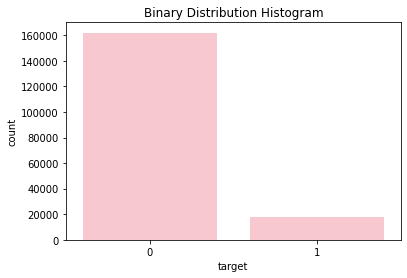

In [182]:
sns.countplot(train['target'], color='pink');
plt.title(label='Binary Distribution Histogram');


In [109]:
train.shape

(180000, 201)

---

# Let's seperate features into those with successful or unsuccessful transactions and store those data frames in new variables, as train_win and train_fail...

In [110]:
# create a data frame with failed transactions ('target' == 0) only

train_fail = train[train['target']==0].copy()

In [111]:
type(train_fail)

pandas.core.frame.DataFrame

In [112]:
train_fail.shape

(161960, 201)

In [113]:
train_fail.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,2.9252,3.1821,14.0137,0.5745,8.7989,14.5691,5.7487,-7.2393,4.2840,30.7133,10.5350,16.2191,2.5791,2.4716,14.3831,13.4325,-5.1488,-0.4073,4.9306,5.9965,-0.3085,12.9041,-3.8766,16.8911,11.1920,10.5785,0.6764,7.8871,4.6667,...,15.4576,5.3133,3.6159,5.0384,6.6760,12.6644,2.7004,-0.6975,9.5981,5.4879,-4.7645,-8.4254,20.8773,3.1531,18.5618,7.7423,-10.1245,13.7241,-3.5189,1.7202,-8.4051,9.0164,3.0657,14.3691,25.8398,5.8764,11.8411,-19.7159,17.5743,0.5857,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,-0.4032,8.0585,14.0239,8.4135,5.4345,13.7003,13.8275,-15.5849,7.8000,28.5708,3.4287,2.7407,8.5524,3.3716,6.9779,13.8910,-11.7684,-2.5586,5.0464,0.5481,-9.2987,7.8755,1.2859,19.3710,11.3702,0.7399,2.7995,5.8434,10.8160,...,29.4846,5.8683,3.8208,15.8348,-5.0121,15.1345,3.2003,9.3192,3.8821,5.7999,5.5378,5.0988,22.0330,5.5134,30.2645,10.4968,-7.2352,16.5721,-7.3477,11.0752,-5.5937,9.4878,-14.9100,9.4245,22.5441,-4.8622,7.6543,-15.9319,13.3175,-0.3566,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,5.9525,-0.3249,-11.2648,14.1929,7.3124,7.5244,14.6472,7.6782,-1.7395,4.7011,20.4775,17.7559,18.1377,1.2145,3.5137,5.6777,13.2177,-7.9940,-2.9029,5.8463,6.1439,-11.1025,12.4858,-2.2871,19.0422,11.0449,4.1087,4.6974,6.9346,10.8917,...,13.2070,5.8442,4.7086,5.7141,-1.0410,20.5092,3.2790,-5.5952,7.3176,5.7690,-7.0927,-3.9116,7.2569,-5.8234,25.6820,10.9202,-0.3104,8.8438,-9.7009,2.4013,-4.2935,9.3908,-13.2648,3.1545,23.0866,-5.3000,5.3745,-6.2660,10.1934,-0.8417,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,8.2450,2.3061,2.8102,13.8463,11.9704,6.4569,14.8372,10.7430,-0.4299,15.9426,13.7257,20.3010,12.5579,6.8202,2.7229,12.1354,13.7367,0.8135,-0.9059,5.9070,2.8407,-15.2398,10.4407,-2.5731,6.1796,10.6093,-5.9158,8.1723,2.8521,9.1738,...,31.8833,5.9684,7.2084,3.8899,-11.0882,17.2502,2.5881,-2.7018,0.5641,5.3430,-7.1541,-6.1920,18.2366,11.7134,14.7483,8.1013,11.8771,13.9552,-10.4701,5.6961,-3.7546,8.4117,1.8986,7.2601,-0.4639,-0.0498,7.9336,-12.8279,12.4124,1.8489,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,7.6784,-9.4458,-12.1419,13.8481,7.8895,7.7894,15.0553,8.4871,-3.0680,6.5263,11.3152,21.4246,18.9608,10.1102,2.7142,14.2080,13.5433,3.1736,-3.3423,5.9015,7.9352,-3.1582,9.4668,-0.0083,19.3239,12.4057,0.6329,2.7922,5.8184,19.3038,...,33.5107,5.6953,5.4663,18.2201,6.5769,21.2607,3.2304,-1.7759,3.1283,5.5518,1.4493,-2.6627,19.8056,2.3705,18.4685,16.3309,-3.3456,13.5261,1.7189,5.1743,-7.6938,9.7685,4.8910,12.2198,11.8503,-7.8931,6.4209,5.9270,16.0201,-0.2829,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [114]:
# make sure it worked

train_fail['target'].unique()

array([0])

In [115]:
# create a date frame with completed transactions only

train_win = train[train['target']==1].copy()

In [116]:
train_win.shape

(18040, 201)

In [117]:
type(train_win)

pandas.core.frame.DataFrame

In [118]:
# make sure it worked
train_win['target'].unique()

array([1])

In [119]:
train_win.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
13,1,16.3699,1.5934,16.7395,7.3330,12.1450,5.9004,4.8222,20.9729,1.1064,8.6978,2.3287,-11.3409,13.7999,2.7925,6.3182,14.7313,7.2594,-2.4759,14.3984,9.1793,16.8467,19.4258,1.6565,2.5107,7.1272,13.6444,-12.8761,-1.0136,5.1773,7.3507,-16.0042,6.4460,-3.3238,14.3372,10.9481,6.7386,-0.5110,4.4335,7.8621,...,32.5287,5.8451,4.9591,11.7805,-7.0936,11.8863,3.2597,-4.3478,7.5711,5.6656,3.5750,-8.6583,20.3131,-2.2723,15.7383,8.1730,-12.4963,15.1929,3.9751,8.5618,2.4566,9.3694,0.6942,11.9694,11.8982,0.6129,10.8123,-1.0803,11.9586,-0.5899,7.4002,7.4031,4.3989,4.0978,17.3638,-1.3022,9.6846,9.0419,15.6064,-10.8529
29,1,5.3301,-2.6064,13.1913,3.1193,6.6483,-6.5659,5.9064,15.2341,1.2915,9.1168,6.8278,1.3898,14.0957,12.3335,9.0616,14.8726,11.3542,5.2004,1.6610,24.3097,3.1983,13.0446,4.3067,2.1315,7.9501,13.9981,-12.6789,-0.7712,5.9889,2.1959,-16.2435,10.9816,-3.2509,7.8550,11.2951,14.3999,2.3497,6.4171,17.5473,...,11.6782,5.3495,5.1066,17.7215,-5.1919,19.0355,2.7651,-7.4054,6.3445,5.4183,8.6643,-10.3910,21.0844,4.1428,4.7056,8.5329,9.4661,9.6265,9.0617,4.3694,-1.1399,10.9190,-3.9144,8.1388,16.4554,4.7923,9.1281,-21.7322,18.6375,0.1734,5.9215,7.9676,2.3405,1.1482,23.2168,-2.0105,3.7600,9.4513,17.4105,-14.6897
63,1,7.7072,0.0183,9.9974,8.3524,9.2886,-13.3627,6.0425,10.1108,1.3999,6.6710,-5.1448,11.0835,14.0503,9.0144,8.8346,14.8138,5.0951,-1.6585,-2.3445,24.4873,9.4153,23.5101,9.3373,2.1534,11.1901,13.2911,-5.2299,-2.5387,4.1148,9.1110,-14.6391,12.8946,-0.9446,6.1225,10.8937,6.4271,0.7646,7.0633,10.1762,...,22.5924,5.3977,3.3740,13.0953,3.0745,16.6974,2.0576,5.5558,3.1795,6.0669,2.5841,7.0790,13.1299,2.2445,23.1283,8.9796,-13.6216,10.5579,6.9716,2.9384,-7.2040,9.7592,15.1720,5.2335,27.6213,-9.2779,5.1130,-13.0577,10.0679,1.9046,1.5832,5.0039,3.8814,7.4241,21.4844,-0.8297,-3.0468,7.5790,15.7685,5.4769
65,1,10.5358,-2.5439,8.7394,6.7548,14.4099,-3.8724,5.1584,15.8381,5.8204,9.0358,-10.7504,7.7587,13.6021,4.2864,8.1159,14.0805,5.1303,4.0575,13.8723,16.9321,14.0983,2.2106,3.9192,2.8896,9.2493,13.5054,-0.4275,-3.2016,6.9686,0.8920,-16.6872,12.0119,0.8354,13.6590,11.7710,8.6702,2.3624,6.5731,9.9303,...,25.3377,5.8066,5.2234,11.3098,-6.7546,30.5059,2.6117,-3.3249,4.7747,6.1149,2.2550,-0.5348,4.5535,-7.2104,19.7545,9.1091,-0.4833,13.7686,3.8680,6.3190,0.9670,12.9782,2.5409,13.7491,11.9410,2.8503,8.2088,-4.6266,10.2542,1.5517,4.6648,6.4227,3.4025,-4.0882,14.1174,-0.2472,5.3847,8.6949,15.1340,3.8449
71,1,6.7547,2.5973,14.2141,8.3514,7.4942,-1.3055,4.2336,15.0243,-1.8922,9.1282,-11.4237,-8.6036,13.9394,3.6480,5.0944,14.4429,9.2046,-4.3236,24.2658,13.5924,16.0715,33.3687,9.6420,2.2948,4.1684,13.3240,-2.8896,-3.2697,3.9168,4.3874,-7.1606,10.7617,-1.5133,7.8835,10.7454,9.3655,3.7260,4.6904,7.9003,...,29.8664,5.7714,4.3278,15.8608,2.9925,13.3188,3.2917,-3.4176,6.6747,5.0565,11.9429,7.7473,8.6512,0.3140,20.4828,8.9715,-3.0613,12.5752,-14.9327,7.9488,9.3111,7.3559,3.7889,15.9203,11.2587,-0.7797,5.1381,6.1459,13.8773,-0.0899,1.4677,3.5935,2.0013,1.5777,18.2820,-4.3408,6.8869,9.3567,18.9013,13.3447


---

# Now we will make 2 more variables as data frames that seperate the target column into 1 data frame and all other features into another data frame, as train_target and train_features

In [120]:
train_target = train['target'].copy()

In [121]:
train_target

0         0
1         0
2         0
3         0
4         0
         ..
179995    0
179996    0
179997    0
179998    0
179999    0
Name: target, Length: 180000, dtype: int64

In [122]:
train_target.unique()

array([0, 1])

In [123]:
train_features = train.drop(columns='target').copy()

In [124]:
train_features

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,2.9252,3.1821,14.0137,0.5745,8.7989,14.5691,5.7487,-7.2393,4.2840,30.7133,10.5350,16.2191,2.5791,2.4716,14.3831,13.4325,-5.1488,-0.4073,4.9306,5.9965,-0.3085,12.9041,-3.8766,16.8911,11.1920,10.5785,0.6764,7.8871,4.6667,3.8743,...,15.4576,5.3133,3.6159,5.0384,6.6760,12.6644,2.7004,-0.6975,9.5981,5.4879,-4.7645,-8.4254,20.8773,3.1531,18.5618,7.7423,-10.1245,13.7241,-3.5189,1.7202,-8.4051,9.0164,3.0657,14.3691,25.8398,5.8764,11.8411,-19.7159,17.5743,0.5857,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,-0.4032,8.0585,14.0239,8.4135,5.4345,13.7003,13.8275,-15.5849,7.8000,28.5708,3.4287,2.7407,8.5524,3.3716,6.9779,13.8910,-11.7684,-2.5586,5.0464,0.5481,-9.2987,7.8755,1.2859,19.3710,11.3702,0.7399,2.7995,5.8434,10.8160,3.6783,...,29.4846,5.8683,3.8208,15.8348,-5.0121,15.1345,3.2003,9.3192,3.8821,5.7999,5.5378,5.0988,22.0330,5.5134,30.2645,10.4968,-7.2352,16.5721,-7.3477,11.0752,-5.5937,9.4878,-14.9100,9.4245,22.5441,-4.8622,7.6543,-15.9319,13.3175,-0.3566,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,5.9525,-0.3249,-11.2648,14.1929,7.3124,7.5244,14.6472,7.6782,-1.7395,4.7011,20.4775,17.7559,18.1377,1.2145,3.5137,5.6777,13.2177,-7.9940,-2.9029,5.8463,6.1439,-11.1025,12.4858,-2.2871,19.0422,11.0449,4.1087,4.6974,6.9346,10.8917,0.9003,...,13.2070,5.8442,4.7086,5.7141,-1.0410,20.5092,3.2790,-5.5952,7.3176,5.7690,-7.0927,-3.9116,7.2569,-5.8234,25.6820,10.9202,-0.3104,8.8438,-9.7009,2.4013,-4.2935,9.3908,-13.2648,3.1545,23.0866,-5.3000,5.3745,-6.2660,10.1934,-0.8417,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,8.2450,2.3061,2.8102,13.8463,11.9704,6.4569,14.8372,10.7430,-0.4299,15.9426,13.7257,20.3010,12.5579,6.8202,2.7229,12.1354,13.7367,0.8135,-0.9059,5.9070,2.8407,-15.2398,10.4407,-2.5731,6.1796,10.6093,-5.9158,8.1723,2.8521,9.1738,0.6665,...,31.8833,5.9684,7.2084,3.8899,-11.0882,17.2502,2.5881,-2.7018,0.5641,5.3430,-7.1541,-6.1920,18.2366,11.7134,14.7483,8.1013,11.8771,13.9552,-10.4701,5.6961,-3.7546,8.4117,1.8986,7.2601,-0.4639,-0.0498,7.9336,-12.8279,12.4124,1.8489,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,7.6784,-9.4458,-12.1419,13.8481,7.8895,7.7894,15.0553,8.4871,-3.0680,6.5263,11.3152,21.4246,18.9608,10.1102,2.7142,14.2080,13.5433,3.1736,-3.3423,5.9015,7.9352,-3.1582,9.4668,-0.0083,19.3239,12.4057,0.6329,2.7922,5.8184,19.3038,1.4450,...,33.5107,5.6953,5.4663,18.2201,6.5769,21.2607,3.2304,-1.7759,3.1283,5.5518,1.4493,-2.6627,19.8056,2.3705,18.4685,16.3309,-3.3456,13.5261,1.7189,5.1743,-7.6938,9.7685,4.8910,12.2198,11.8503,-7.8931,6.4209,5.9270,16.0201,-0.2829,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179995,8.9112,-4.49

---

# Now we will explore to check the correlation values between all the variable columns to ensure there are no substantial correlations between variables.

In [125]:
# correlate absolute values 
corr_vals = train_features.corr().abs()
# reshape the data frame as new variable
corr_vector = corr_vals.unstack()

In [126]:
# use boolean logic to sort output into new variable
corr_vector_less_than_one = corr_vector[corr_vector<1]

corr_vector_sorted = corr_vector_less_than_one.sort_values(ascending=False)

print(corr_vector_sorted[1:10])

var_26   var_139    0.009935
var_53   var_148    0.009786
var_148  var_53     0.009786
var_165  var_81     0.009728
var_81   var_165    0.009728
var_121  var_149    0.009660
var_149  var_121    0.009660
var_146  var_169    0.009601
var_169  var_146    0.009601
dtype: float64


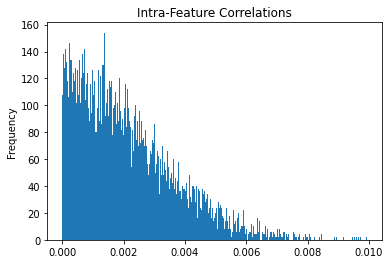

In [127]:
# Plot the sorted correlation values using matplotlib
corr_vector_sorted.plot(kind='hist', bins=1000);
plt.title(label='Intra-Feature Correlations');
# This shows very low correlation values, which justifies classifying 'target' using naive bayes

---

# We can create a function to make distribution plots to visualize the features against 'target'

In [128]:
def draw_histograms(df_zeros, df_ones, variables, n_rows, n_cols):
    
    fig=plt.figure(figsize=(3.5*n_cols,3.5*n_rows))

    
    for idx, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,idx+1)
        data_zeros = df_zeros[var_name]
        data_ones  = df_ones[var_name]  
        bin_lims = 25     
        # Computing the histograms
        hist1, bins1 = np.histogram(data_zeros, bins=bin_lims)
        hist2, bins2 = np.histogram(data_ones, bins=bin_lims)
        # Normalizing
        hist1b = hist1/np.max(hist1)
        hist2b = hist2/np.max(hist2)
        # Plot the hostograms
        ax.plot(bins1[1:], hist1b, label = '0')
        ax.plot(bins2[1:], hist2b, label = '1')
        # Add the plot title
        ax.set_title(var_name+" Distribution")
        ax.legend()
    
    fig.tight_layout()  # Improves appearance a bit.
    
    plt.show()

In [129]:
hist_fail = train_fail.copy()
hist_fail.drop(['target'],axis=1,inplace=True)
hist_win = train_win.copy()
hist_win.drop(['target'],axis=1,inplace=True)

Draw the plot...

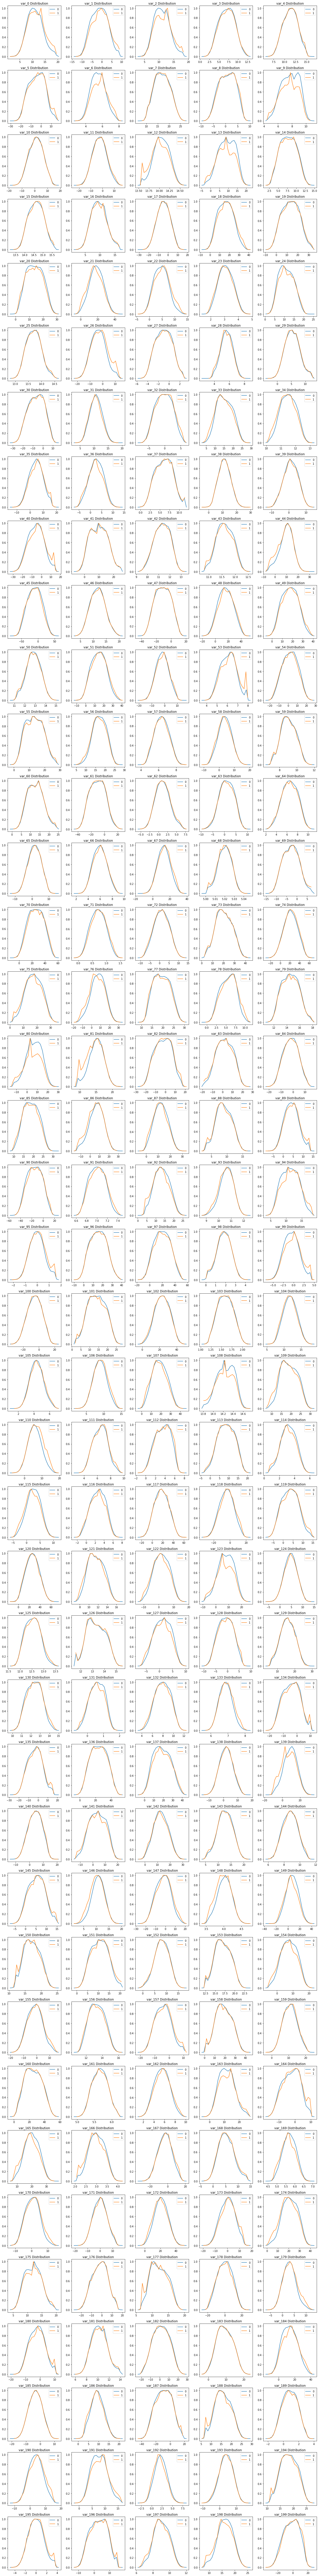

In [130]:
draw_histograms(hist_fail, hist_win, hist_fail.columns, 40, 5)

---

# Setting up a Gaussian model without equalization...

First we have to break out our data frame into x and y variables and declare which model we are using.

In [131]:
y = train.target.copy()
X = train.drop('target', axis=1).copy()

In [132]:
model = GaussianNB()

Then fit x and y onto the model.

In [133]:
model.fit(X,y)

GaussianNB(priors=None, var_smoothing=1e-09)

Look at the 'target' variable

In [134]:
y.shape

(180000,)

Perform classification on an array of test vectors x

- Look at the predictions for the same training set

In [135]:
predicted_y = model.predict(X)

Examine the confusion matrix for results

In [136]:
metrics.confusion_matrix(y,predicted_y)

array([[159312,   2648],
       [ 11478,   6562]])

Calculate the classification accuracy

In [137]:
metrics.accuracy_score(y,predicted_y )

0.9215222222222222

Use code to split the training data into training set and testing set

In [138]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.25)

Verify consistency between data sets

In [139]:
X_train.shape

(135000, 200)

In [140]:
X_test.shape

(45000, 200)

Write a loop to iterate over multiple training/test set splits and examine the sets of accuracies produced

In [141]:
results = np.zeros(1000)

for idx in range(1000):
  if idx%100==0: print('Iteration = ', idx)
  X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.25)
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  results[idx] = metrics.accuracy_score(y_test,y_pred)

print(results.mean())

Iteration =  0
Iteration =  100
Iteration =  200
Iteration =  300
Iteration =  400
Iteration =  500
Iteration =  600
Iteration =  700
Iteration =  800
Iteration =  900
0.9211198666666667


---

# Now we will pare down the unsuccessful transactions and shuffle them to match the size of the successful transactions. 

In [142]:
train_fail.shape

(161960, 201)

In [143]:
train_win.shape

(18040, 201)

In [144]:
train_fail_shuffled = train_fail.sample(frac=18040/161960).reset_index(drop=True).copy()
train_fail_shuffled.shape

(18040, 201)

## Now create a new data frame with the equalized data sets

In [145]:
train_equalized = pd.concat([train_win,train_fail_shuffled])
train_equalized.shape

(36080, 201)

In [146]:
type(train_equalized)

pandas.core.frame.DataFrame

In [147]:
train_equalized.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
13,1,16.3699,1.5934,16.7395,7.3330,12.1450,5.9004,4.8222,20.9729,1.1064,8.6978,2.3287,-11.3409,13.7999,2.7925,6.3182,14.7313,7.2594,-2.4759,14.3984,9.1793,16.8467,19.4258,1.6565,2.5107,7.1272,13.6444,-12.8761,-1.0136,5.1773,7.3507,-16.0042,6.4460,-3.3238,14.3372,10.9481,6.7386,-0.5110,4.4335,7.8621,...,32.5287,5.8451,4.9591,11.7805,-7.0936,11.8863,3.2597,-4.3478,7.5711,5.6656,3.5750,-8.6583,20.3131,-2.2723,15.7383,8.1730,-12.4963,15.1929,3.9751,8.5618,2.4566,9.3694,0.6942,11.9694,11.8982,0.6129,10.8123,-1.0803,11.9586,-0.5899,7.4002,7.4031,4.3989,4.0978,17.3638,-1.3022,9.6846,9.0419,15.6064,-10.8529
29,1,5.3301,-2.6064,13.1913,3.1193,6.6483,-6.5659,5.9064,15.2341,1.2915,9.1168,6.8278,1.3898,14.0957,12.3335,9.0616,14.8726,11.3542,5.2004,1.6610,24.3097,3.1983,13.0446,4.3067,2.1315,7.9501,13.9981,-12.6789,-0.7712,5.9889,2.1959,-16.2435,10.9816,-3.2509,7.8550,11.2951,14.3999,2.3497,6.4171,17.5473,...,11.6782,5.3495,5.1066,17.7215,-5.1919,19.0355,2.7651,-7.4054,6.3445,5.4183,8.6643,-10.3910,21.0844,4.1428,4.7056,8.5329,9.4661,9.6265,9.0617,4.3694,-1.1399,10.9190,-3.9144,8.1388,16.4554,4.7923,9.1281,-21.7322,18.6375,0.1734,5.9215,7.9676,2.3405,1.1482,23.2168,-2.0105,3.7600,9.4513,17.4105,-14.6897
63,1,7.7072,0.0183,9.9974,8.3524,9.2886,-13.3627,6.0425,10.1108,1.3999,6.6710,-5.1448,11.0835,14.0503,9.0144,8.8346,14.8138,5.0951,-1.6585,-2.3445,24.4873,9.4153,23.5101,9.3373,2.1534,11.1901,13.2911,-5.2299,-2.5387,4.1148,9.1110,-14.6391,12.8946,-0.9446,6.1225,10.8937,6.4271,0.7646,7.0633,10.1762,...,22.5924,5.3977,3.3740,13.0953,3.0745,16.6974,2.0576,5.5558,3.1795,6.0669,2.5841,7.0790,13.1299,2.2445,23.1283,8.9796,-13.6216,10.5579,6.9716,2.9384,-7.2040,9.7592,15.1720,5.2335,27.6213,-9.2779,5.1130,-13.0577,10.0679,1.9046,1.5832,5.0039,3.8814,7.4241,21.4844,-0.8297,-3.0468,7.5790,15.7685,5.4769
65,1,10.5358,-2.5439,8.7394,6.7548,14.4099,-3.8724,5.1584,15.8381,5.8204,9.0358,-10.7504,7.7587,13.6021,4.2864,8.1159,14.0805,5.1303,4.0575,13.8723,16.9321,14.0983,2.2106,3.9192,2.8896,9.2493,13.5054,-0.4275,-3.2016,6.9686,0.8920,-16.6872,12.0119,0.8354,13.6590,11.7710,8.6702,2.3624,6.5731,9.9303,...,25.3377,5.8066,5.2234,11.3098,-6.7546,30.5059,2.6117,-3.3249,4.7747,6.1149,2.2550,-0.5348,4.5535,-7.2104,19.7545,9.1091,-0.4833,13.7686,3.8680,6.3190,0.9670,12.9782,2.5409,13.7491,11.9410,2.8503,8.2088,-4.6266,10.2542,1.5517,4.6648,6.4227,3.4025,-4.0882,14.1174,-0.2472,5.3847,8.6949,15.1340,3.8449
71,1,6.7547,2.5973,14.2141,8.3514,7.4942,-1.3055,4.2336,15.0243,-1.8922,9.1282,-11.4237,-8.6036,13.9394,3.6480,5.0944,14.4429,9.2046,-4.3236,24.2658,13.5924,16.0715,33.3687,9.6420,2.2948,4.1684,13.3240,-2.8896,-3.2697,3.9168,4.3874,-7.1606,10.7617,-1.5133,7.8835,10.7454,9.3655,3.7260,4.6904,7.9003,...,29.8664,5.7714,4.3278,15.8608,2.9925,13.3188,3.2917,-3.4176,6.6747,5.0565,11.9429,7.7473,8.6512,0.3140,20.4828,8.9715,-3.0613,12.5752,-14.9327,7.9488,9.3111,7.3559,3.7889,15.9203,11.2587,-0.7797,5.1381,6.1459,13.8773,-0.0899,1.4677,3.5935,2.0013,1.5777,18.2820,-4.3408,6.8869,9.3567,18.9013,13.3447


# Now we will make a model using the equalized data frame...

First we have to break out our data frame into x and y variables and declare which model we are using.

In [148]:
y1 = train_equalized.target.copy()
X1 = train_equalized.drop('target', axis=1).copy()

In [149]:
model_eq = GaussianNB()

## Then fit x and y onto the model.

In [150]:
model_eq.fit(X1,y1)

GaussianNB(priors=None, var_smoothing=1e-09)

In [151]:
y1.shape

(36080,)

## Perform classification on an array of test vectors x

In [152]:
predicted_y1 = model_eq.predict(X1)

In [153]:
metrics.confusion_matrix(y1,predicted_y1)

array([[14639,  3401],
       [ 3584, 14456]])

In [154]:
metrics.accuracy_score(y1,predicted_y1)

0.8064024390243902

In [155]:
X_train1, X_test1, y_train1, y_test1 = model_selection.train_test_split(X1,y1,test_size=0.25)

In [156]:
X_train1.shape

(27060, 200)

In [157]:
X_test1.shape

(9020, 200)

In [158]:
results1 = np.zeros(1000)

for idx in range(1000):
  if idx%100==0: print('Iteration = ', idx)
  X_train1, X_test1, y_train1, y_test1 = model_selection.train_test_split(X1,y1,test_size=0.25)
  model_eq.fit(X_train1,y_train1)
  y_pred1 = model_eq.predict(X_test1)
  results1[idx] = metrics.accuracy_score(y_test1,y_pred1)

print(results1.mean())

Iteration =  0
Iteration =  100
Iteration =  200
Iteration =  300
Iteration =  400
Iteration =  500
Iteration =  600
Iteration =  700
Iteration =  800
Iteration =  900
0.8028706208425721


# Conclusion: 
- Even though the accuracy is only 80%, its higher compared to the model used on the larger data set. 
- If you guessed '0' every time on the larger data set, you would get 90% accuracy. The model increases that accuracy by 2%. 
-By comparison, with the equalized data set if you guessed '0' everytime you would get 50% right. With the model you get 80%; a net increase of 30% accuracy. 

# Visualizing results!

This shows the confusion matrix from the complete data set

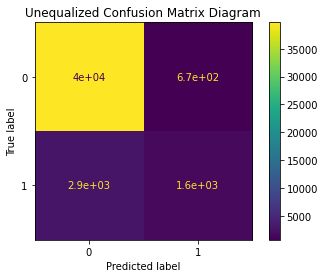

In [159]:
metrics.plot_confusion_matrix(model,X_test,y_test);
plt.title(label='Unequalized Confusion Matrix Diagram');


This displays the confusion matrix from the equalized data frame

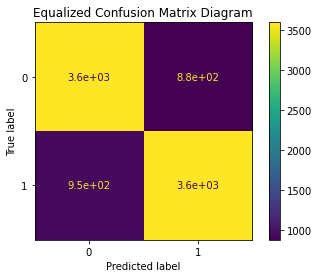

In [160]:
metrics.plot_confusion_matrix(model_eq,X_test1,y_test1);
plt.title(label='Equalized Confusion Matrix Diagram');


In [161]:
results.mean()

0.9211198666666667

## Now we will make a plot showing the 2 different models with their fluctions and average accuracy

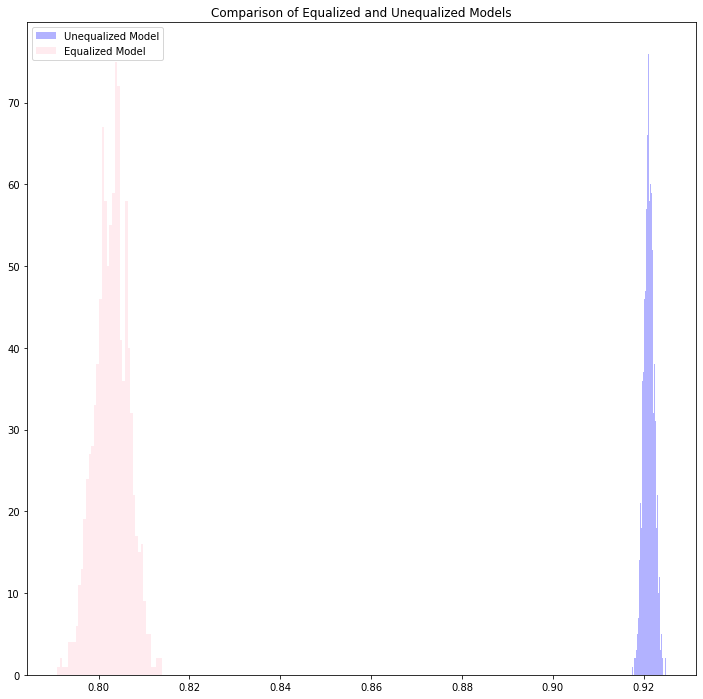

In [162]:
plt.figure(figsize=(12,12))
#plt.style.use('seaborn-whitegrid')

#x1 = np.random.normal(0, 0.8, 1000)

x1 = results
x2 = results1

kwargs = dict(histtype='stepfilled', alpha=0.3, bins=40)

plt.title(label='Comparison of Equalized and Unequalized Models');

plt.hist(x1, label = 'Unequalized Model', **kwargs, color='blue');
plt.hist(x2, label = 'Equalized Model', **kwargs, color='pink');
plt.legend();


Here is another representation of the same comparison...

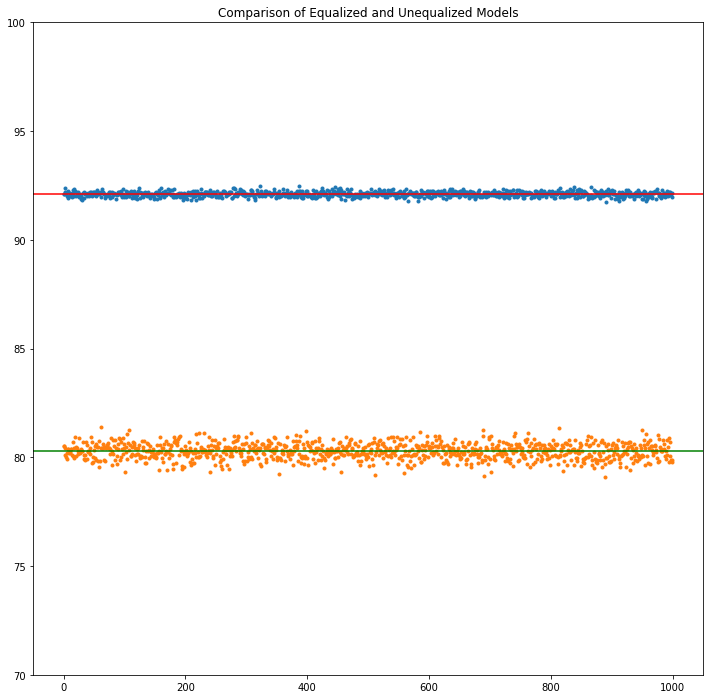

In [163]:
#import matplotlib
#matplotlib.style.use(andrews_curves(data, 'Name', colormap='winter'))
plt.figure(figsize=(12,12))
plt.plot(100*results,'.')
plt.axhline(100*results.mean(),c='red')
plt.plot(100*results1,'.')
plt.axhline(100*results1.mean(),c='green')
plt.ylim(70,100);
plt.title(label='Comparison of Equalized and Unequalized Models');


---

# Now we will plug our test data to make a prediction with the models we have created



First we will link our new data to variable names


In [164]:
train_blind = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Train_blind.csv')
sample_submission = pd.read_csv('/content/drive/My Drive/Colab Notebooks/sample_submission.csv')

## Submitting Results From Blinded Test Data

Train your unequalized model on the full unequalized data set.




In [165]:
model.fit(X,y)

GaussianNB(priors=None, var_smoothing=1e-09)

Train your equalized model on the full equalized data set.


In [166]:
model_eq.fit(X1,y1)

GaussianNB(priors=None, var_smoothing=1e-09)

Load the blinded data for testing.

In [167]:
type(train_blind)

pandas.core.frame.DataFrame

In [168]:
train_blind.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,2.9252,3.1821,14.0137,0.5745,8.7989,14.5691,5.7487,-7.2393,4.2840,30.7133,10.5350,16.2191,2.5791,2.4716,14.3831,13.4325,-5.1488,-0.4073,4.9306,5.9965,-0.3085,12.9041,-3.8766,16.8911,11.1920,10.5785,0.6764,7.8871,4.6667,...,15.4576,5.3133,3.6159,5.0384,6.6760,12.6644,2.7004,-0.6975,9.5981,5.4879,-4.7645,-8.4254,20.8773,3.1531,18.5618,7.7423,-10.1245,13.7241,-3.5189,1.7202,-8.4051,9.0164,3.0657,14.3691,25.8398,5.8764,11.8411,-19.7159,17.5743,0.5857,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,-0.4032,8.0585,14.0239,8.4135,5.4345,13.7003,13.8275,-15.5849,7.8000,28.5708,3.4287,2.7407,8.5524,3.3716,6.9779,13.8910,-11.7684,-2.5586,5.0464,0.5481,-9.2987,7.8755,1.2859,19.3710,11.3702,0.7399,2.7995,5.8434,10.8160,...,29.4846,5.8683,3.8208,15.8348,-5.0121,15.1345,3.2003,9.3192,3.8821,5.7999,5.5378,5.0988,22.0330,5.5134,30.2645,10.4968,-7.2352,16.5721,-7.3477,11.0752,-5.5937,9.4878,-14.9100,9.4245,22.5441,-4.8622,7.6543,-15.9319,13.3175,-0.3566,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,5.9525,-0.3249,-11.2648,14.1929,7.3124,7.5244,14.6472,7.6782,-1.7395,4.7011,20.4775,17.7559,18.1377,1.2145,3.5137,5.6777,13.2177,-7.9940,-2.9029,5.8463,6.1439,-11.1025,12.4858,-2.2871,19.0422,11.0449,4.1087,4.6974,6.9346,10.8917,...,13.2070,5.8442,4.7086,5.7141,-1.0410,20.5092,3.2790,-5.5952,7.3176,5.7690,-7.0927,-3.9116,7.2569,-5.8234,25.6820,10.9202,-0.3104,8.8438,-9.7009,2.4013,-4.2935,9.3908,-13.2648,3.1545,23.0866,-5.3000,5.3745,-6.2660,10.1934,-0.8417,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,8.2450,2.3061,2.8102,13.8463,11.9704,6.4569,14.8372,10.7430,-0.4299,15.9426,13.7257,20.3010,12.5579,6.8202,2.7229,12.1354,13.7367,0.8135,-0.9059,5.9070,2.8407,-15.2398,10.4407,-2.5731,6.1796,10.6093,-5.9158,8.1723,2.8521,9.1738,...,31.8833,5.9684,7.2084,3.8899,-11.0882,17.2502,2.5881,-2.7018,0.5641,5.3430,-7.1541,-6.1920,18.2366,11.7134,14.7483,8.1013,11.8771,13.9552,-10.4701,5.6961,-3.7546,8.4117,1.8986,7.2601,-0.4639,-0.0498,7.9336,-12.8279,12.4124,1.8489,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,7.6784,-9.4458,-12.1419,13.8481,7.8895,7.7894,15.0553,8.4871,-3.0680,6.5263,11.3152,21.4246,18.9608,10.1102,2.7142,14.2080,13.5433,3.1736,-3.3423,5.9015,7.9352,-3.1582,9.4668,-0.0083,19.3239,12.4057,0.6329,2.7922,5.8184,19.3038,...,33.5107,5.6953,5.4663,18.2201,6.5769,21.2607,3.2304,-1.7759,3.1283,5.5518,1.4493,-2.6627,19.8056,2.3705,18.4685,16.3309,-3.3456,13.5261,1.7189,5.1743,-7.6938,9.7685,4.8910,12.2198,11.8503,-7.8931,6.4209,5.9270,16.0201,-0.2829,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [169]:
test_data_blinded_features = train_blind.drop(['ID_code'],axis=1).copy()

In [170]:
test_data_blinded_features.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,2.9252,3.1821,14.0137,0.5745,8.7989,14.5691,5.7487,-7.2393,4.2840,30.7133,10.5350,16.2191,2.5791,2.4716,14.3831,13.4325,-5.1488,-0.4073,4.9306,5.9965,-0.3085,12.9041,-3.8766,16.8911,11.1920,10.5785,0.6764,7.8871,4.6667,3.8743,...,15.4576,5.3133,3.6159,5.0384,6.6760,12.6644,2.7004,-0.6975,9.5981,5.4879,-4.7645,-8.4254,20.8773,3.1531,18.5618,7.7423,-10.1245,13.7241,-3.5189,1.7202,-8.4051,9.0164,3.0657,14.3691,25.8398,5.8764,11.8411,-19.7159,17.5743,0.5857,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,-0.4032,8.0585,14.0239,8.4135,5.4345,13.7003,13.8275,-15.5849,7.8000,28.5708,3.4287,2.7407,8.5524,3.3716,6.9779,13.8910,-11.7684,-2.5586,5.0464,0.5481,-9.2987,7.8755,1.2859,19.3710,11.3702,0.7399,2.7995,5.8434,10.8160,3.6783,...,29.4846,5.8683,3.8208,15.8348,-5.0121,15.1345,3.2003,9.3192,3.8821,5.7999,5.5378,5.0988,22.0330,5.5134,30.2645,10.4968,-7.2352,16.5721,-7.3477,11.0752,-5.5937,9.4878,-14.9100,9.4245,22.5441,-4.8622,7.6543,-15.9319,13.3175,-0.3566,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,5.9525,-0.3249,-11.2648,14.1929,7.3124,7.5244,14.6472,7.6782,-1.7395,4.7011,20.4775,17.7559,18.1377,1.2145,3.5137,5.6777,13.2177,-7.9940,-2.9029,5.8463,6.1439,-11.1025,12.4858,-2.2871,19.0422,11.0449,4.1087,4.6974,6.9346,10.8917,0.9003,...,13.2070,5.8442,4.7086,5.7141,-1.0410,20.5092,3.2790,-5.5952,7.3176,5.7690,-7.0927,-3.9116,7.2569,-5.8234,25.6820,10.9202,-0.3104,8.8438,-9.7009,2.4013,-4.2935,9.3908,-13.2648,3.1545,23.0866,-5.3000,5.3745,-6.2660,10.1934,-0.8417,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,8.2450,2.3061,2.8102,13.8463,11.9704,6.4569,14.8372,10.7430,-0.4299,15.9426,13.7257,20.3010,12.5579,6.8202,2.7229,12.1354,13.7367,0.8135,-0.9059,5.9070,2.8407,-15.2398,10.4407,-2.5731,6.1796,10.6093,-5.9158,8.1723,2.8521,9.1738,0.6665,...,31.8833,5.9684,7.2084,3.8899,-11.0882,17.2502,2.5881,-2.7018,0.5641,5.3430,-7.1541,-6.1920,18.2366,11.7134,14.7483,8.1013,11.8771,13.9552,-10.4701,5.6961,-3.7546,8.4117,1.8986,7.2601,-0.4639,-0.0498,7.9336,-12.8279,12.4124,1.8489,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,7.6784,-9.4458,-12.1419,13.8481,7.8895,7.7894,15.0553,8.4871,-3.0680,6.5263,11.3152,21.4246,18.9608,10.1102,2.7142,14.2080,13.5433,3.1736,-3.3423,5.9015,7.9352,-3.1582,9.4668,-0.0083,19.3239,12.4057,0.6329,2.7922,5.8184,19.3038,1.4450,...,33.5107,5.6953,5.4663,18.2201,6.5769,21.2607,3.2304,-1.7759,3.1283,5.5518,1.4493,-2.6627,19.8056,2.3705,18.4685,16.3309,-3.3456,13.5261,1.7189,5.1743,-7.6938,9.7685,4.8910,12.2198,11.8503,-7.8931,6.4209,5.9270,16.0201,-0.2829,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


Let's see what's in the sample_submission.csv file.



In [171]:
sample_submission.head()

,ID_code,target
0,train_0,0
1,train_1,0
2,train_2,0
3,train_3,0
4,train_4,0


*Predict results using full unequalized data.*

In [172]:
predict_unequalized = model.predict(test_data_blinded_features)

*Predict results using full equalized data.*

In [173]:
predict_equalized = model_eq.predict(test_data_blinded_features)

Prepare submission for unequalized data.

In [174]:
final_submission_unequalized = sample_submission.copy()

In [175]:
final_submission_unequalized['target'] = predict_unequalized

In [176]:
final_submission_unequalized.head(20)

,ID_code,target
0,train_0,0
1,train_1,1
2,train_2,0
3,train_3,0
4,train_4,0
5,train_5,0
6,train_6,0
7,train_7,0
8,train_8,0
9,train_9,0


In [177]:
final_submission_unequalized.to_csv('/content/drive/My Drive/Colab Notebooks/final_submission_unequalized.csv',index=False)

Prepare submission for equalized data.

In [178]:
final_submission_equalized = sample_submission.copy()

In [179]:
final_submission_equalized['target'] = predict_equalized

In [180]:
final_submission_equalized.head(20)

,ID_code,target
0,train_0,0
1,train_1,1
2,train_2,0
3,train_3,1
4,train_4,0
5,train_5,0
6,train_6,1
7,train_7,0
8,train_8,0
9,train_9,0


In [181]:
final_submission_equalized.to_csv('/content/drive/My Drive/Colab Notebooks/final_submission_equalized.csv',index=False)